# Phase 1 Project Submission

Please fill out:
* Student name: Ning Chen
* Student pace: full time
* Scheduled project review date/time: 11/06/2020
* Instructor name: Fangfang Lee & Justin Tennenbaum
* Blog post URL:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import json
import time
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%capture
#from tqdm import tqdm_notebook as tqdm
from tqdm.notebook import tqdm
tqdm().pandas()

In [3]:
f = open('tmdb_api.json')
api_key = json.load(f)
url = f'https://api.themoviedb.org/3/discover/movie?api_key={api_key}'

ids = []
discover = []
random = np.random.uniform(0, 0.1, 501)

# for i in tqdm.notebook.tqdm(range(1, 101)):
for i in tqdm(range(1, 11)):
    params = {  # 'vote_count.gte': 1,
        # 'sort_by': 'vote_count.desc',
        'page': i,
        # 'primary_release_year': 2020,
        'language': 'en-US',
        'include_adult': 'false',
        'include_video': 'false'}
    response = requests.get(url, params)
    d = response.json()
    discover.extend(d['results'])
    ids.extend([d['results'][j]['id'] for j in range(len(d['results']))])
    time.sleep(random[i])
    mov_ids.extend([x['id'] for x in content['results']])

In [31]:
# df = pd.DataFrame(discover)
# df.to_csv('data_TMDB/discover2020.csv')

In [4]:
d.keys(),d['total_pages'],d['page']

(dict_keys(['page', 'total_results', 'total_pages', 'results']), 500, 10)

In [5]:
film = []
for i in tqdm(ids):
    url = f'https://api.themoviedb.org/3/movie/{i}?api_key={api_key}'
    params = {'language': 'en-US'}
    response = requests.get(url, params)
    film.append(response.json())
    time.sleep(np.random.uniform(0.1, 0.5))

In [84]:
dis = pd.read_csv('data_TMDB/discover.csv',engine='python')
df = pd.read_csv('data_TMDB/en_csv.csv')
df5 = pd.read_csv('data_TMDB/five_year.csv')

In [74]:
dis.columns

Index(['Unnamed: 0', 'popularity', 'vote_count', 'video', 'poster_path', 'id',
       'adult', 'backdrop_path', 'original_language', 'original_title',
       'genre_ids', 'title', 'vote_average', 'overview', 'release_date'],
      dtype='object')

In [7]:
df.columns

Index(['Unnamed: 0', 'adult', 'backdrop_path', 'belongs_to_collection',
       'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'success', 'status_code',
       'status_message'],
      dtype='object')

In [76]:
col_dis=['Unnamed: 0', 'video', 'poster_path','adult', 'backdrop_path', 'overview']

col5=['Unnamed: 0', 'Unnamed: 0.1','adult','backdrop_path','belongs_to_collection','homepage','overview','poster_path','production_companies',
'production_countries','spoken_languages','status','tagline','video','success','status_code','status_message']

col=['Unnamed: 0','adult','backdrop_path','belongs_to_collection','homepage','overview','poster_path','production_companies',
'production_countries','spoken_languages','status','tagline','video','success','status_code','status_message']

In [85]:
df.drop(columns=col,axis=1, inplace=True)
df5.drop(columns=col5,axis=1, inplace=True)
dis.drop(columns=col_dis,axis=1, inplace=True)

In [86]:
dis.dropna(inplace=True)
df.dropna(inplace=True)
df5.dropna(inplace=True)

In [87]:
dis.to_csv('data_TMDB/discover_trim.csv', index=False)
df.to_csv('data_TMDB/en_trim.csv', index=False)
df5.to_csv('data_TMDB/fiveyear_trim.csv', index=False)

In [184]:
#dis = pd.read_csv('data_TMDB/discover_trim.csv')
df = pd.read_csv('data_TMDB/en_trim.csv')
#df5 = pd.read_csv('data_TMDB/fiveyear_trim.csv')

In [30]:
dis.head()

,popularity,vote_count,id,original_language,original_title,genre_ids,title,vote_average,release_date,year
0,306.289,7525.0,283366.0,en,Miss Peregrine's Home for Peculiar Children,"[18, 14, 12, 10751]",Miss Peregrine's Home for Peculiar Children,6.7,2016-09-28,2016
1,165.302,303.0,420634.0,en,Terrifier,"[53, 27]",Terrifier,6.3,2016-10-15,2016
2,131.741,3734.0,316727.0,en,The Purge: Election Year,"[28, 27, 53]",The Purge: Election Year,6.4,2016-06-29,2016
3,130.125,6596.0,372058.0,ja,君の名は。,"[10749, 16, 18]",Your Name.,8.6,2016-08-26,2016
4,96.344,5629.0,335797.0,en,Sing,"[16, 35, 18, 10751, 10402]",Sing,7.0,2016-11-23,2016


In [88]:
dis['year'] = dis.release_date.str[:4]

In [61]:
dis_rate = dis[(dis.vote_average != 0) & (dis.vote_average != 10)]

In [29]:
dis_rate.groupby('year').vote_average.agg(['mean','min','max','std'])

,mean,min,max,std
year,,,,
2016,6.021084,0.5,9.8,1.559531
2017,6.139893,0.5,9.9,1.523518
2018,6.197032,0.5,9.7,1.519795
2019,6.224129,0.5,9.9,1.563777
2020,6.036337,1.0,9.8,1.862345


Text(0.5, 1.0, 'top 10 languages')

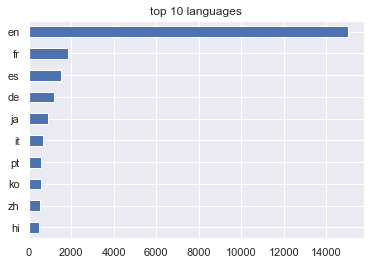

In [232]:
dis.original_language.value_counts()[:10][::-1].plot(kind='barh')
plt.title('top 10 languages')

In [68]:
mean = dis_rate.groupby('year').vote_average.mean()

Text(0.5, 1.0, 'rate probability distribution')

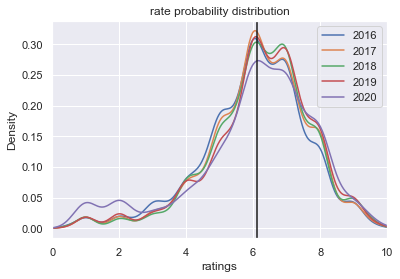

In [251]:
dis.groupby('year').vote_average.plot(kind='kde')
plt.axvline(dis_rate.vote_average.mean(),color='k')
plt.legend()
plt.xlabel('ratings')
plt.xlim(0,10)
plt.title('rate probability distribution')

In [89]:
pd.options.mode.chained_assignment = None

In [117]:
dfbr = df[(df['budget']!=0) & (df['revenue']!=0)]
df5br = df5[(df5['budget']!=0) & (df5['revenue']!=0)]

In [77]:
df.shape, df5.shape, dfbr.shape, df5br.shape

((9882, 13), (36975, 13), (4483, 13), (1086, 13))

In [120]:
df5br['year'] = df5br.release_date.str[:4]

In [118]:
df5br['profit'] = df5br.revenue-df5br.budget

In [91]:
dfbr['year'] = dfbr.release_date.str[:4]

In [108]:
sns.set()

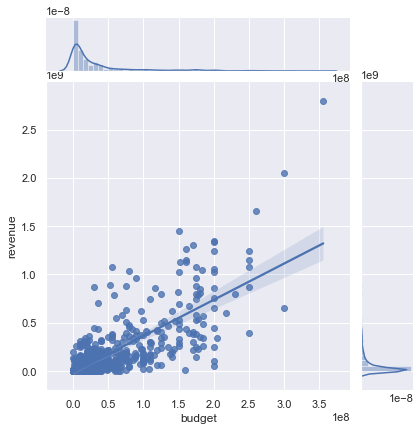

In [143]:
sns.jointplot(x='budget', y='revenue', data=df5br, kind="reg")

Text(0.5, 1.0, 'budget vs revenue in yr 2016-2020')

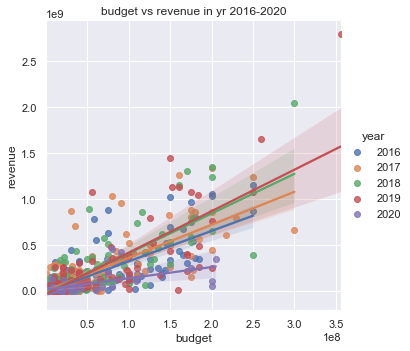

In [144]:
sns.lmplot(x='budget', y='revenue',data=df5br, hue='year')
plt.title('budget vs revenue in yr 2016-2020')

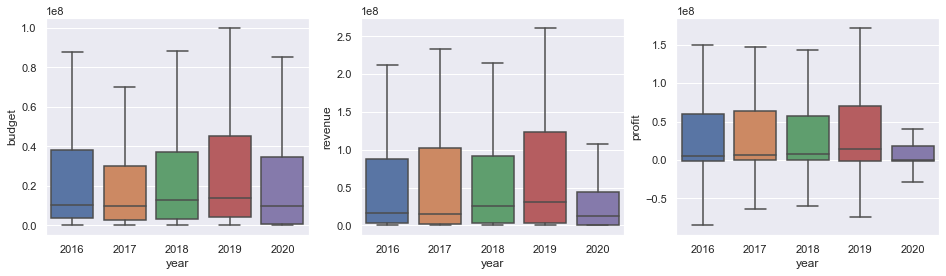

In [141]:
fig, ax = plt.subplots(1, 3, figsize=(16,4))
sns.boxplot(x='year',y='budget',data=df5br, ax=ax[0], showfliers = False)
sns.boxplot(x='year',y='revenue',data=df5br, ax=ax[1], showfliers = False)
sns.boxplot(x='year',y='profit',data=df5br, ax=ax[2], showfliers = False)

In [199]:
df['genre'] = None
for i in range(len(df.genres)):    
    ls = df.genres[i].split(',')
    df['genre'][i] = [ls[j][10:-2] for j in range(1,len(ls)-1,2)]
    df['genre'][i].append(ls[-1][10:-3])

In [228]:
df.shape

(9882, 14)

In [203]:
gen = pd.DataFrame(df.genre.tolist()).stack()

In [215]:
gen = pd.DataFrame(df.genre.tolist()).stack()
gen.index = gen.index.droplevel(-1)
gen.name = 'gen'
df.join(gen).groupby('gen')

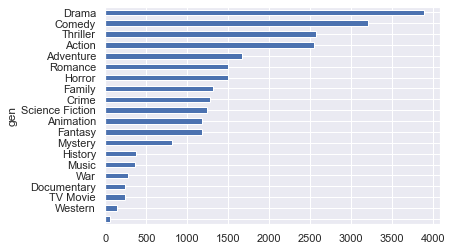

In [231]:
df.join(gen).groupby('gen').size().sort_values().plot(kind='barh')

In [244]:
dfbr['profit'] = dfbr.revenue-dfbr.budget

In [249]:
dfbr.join(gen).groupby('gen')['profit'].agg(['mean','median','std']).sort_values(by='mean', ascending=False)

,mean,median,std
gen,,,
Animation,1.757534e+08,80275281.5,2.449711e+08
Adventure,1.725727e+08,58302868.0,2.826274e+08
Fantasy,1.520544e+08,48975405.5,2.621908e+08
Family,1.398301e+08,58079915.0,2.150312e+08
Science Fiction,1.248415e+08,26159753.0,2.697359e+08
Action,1.148506e+08,37323000.0,2.284672e+08
Comedy,8.024314e+07,31057317.5,1.377819e+08
Music,7.114189e+07,13565358.0,1.665966e+08
Romance,7.029643e+07,25546556.0,1.378286e+08


In [250]:
dfbr.join(gen).groupby('gen')['vote_average'].agg(['mean','median','std']).sort_values(by='mean', ascending=False)

,mean,median,std
gen,,,
Documentary,7.010000,7.0,0.697288
History,6.982915,7.0,0.675554
War,6.970807,7.1,0.760233
Western,6.815068,6.9,0.892355
Drama,6.800267,6.8,0.784575
Music,6.737333,6.7,0.753297
Animation,6.725926,6.8,0.834589
Romance,6.580775,6.6,0.751234
Crime,6.572552,6.5,0.836366


In [ ]:
# https://api.themoviedb.org/3/movie/157336?api_key={api_key}
# https://api.themoviedb.org/3/movie/157336/videos?api_key={api_key}
    
# single request:
# https://api.themoviedb.org/3/movie/157336?api_key={api_key}&append_to_response=videos
# multiple requests
# https://api.themoviedb.org/3/movie/157336?api_key={api_key}&append_to_response=videos,images

# popularity.asc
# popularity.desc
# release_date.asc
# release_date.desc
# revenue.asc
# revenue.desc
# primary_release_date.asc
# primary_release_date.desc
# original_title.asc
# original_title.desc
# vote_average.asc
# vote_average.desc
# vote_count.asc
# vote_count.desc